#
<div class="alert alert-block alert-warning"  style="background-color: #d59bf2; color: black;">  
<h2> Installations </h2>
Installing libraries, modules, dataset, etc.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
import seaborn as sns
from PIL import Image
%config InlineBackend.figure_format = 'retina'

[Here is the link to the dataset!](https://www.kaggle.com/datasets/shivamkumar121215/nba-stats-dataset-for-last-10-years?select=nba.csv)

In [2]:
nba_df = pd.read_csv("nba.csv")

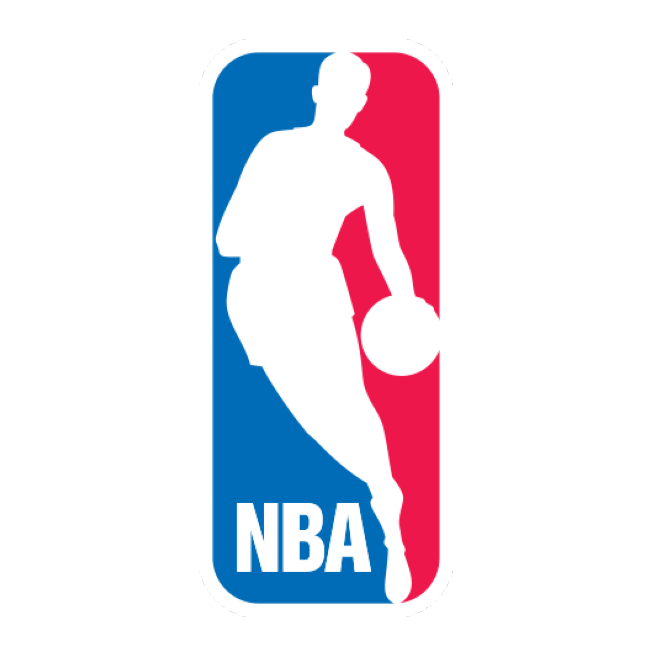

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
image = Image.open("nba.png")
ax.imshow(image)
ax.axis('off') 
plt.show()

NBA HEX:
- Blue: #016bb7
- Red: #ed184a

#
<div class="alert alert-block alert-warning"  style="background-color: #d59bf2; color: black;">  
<h2> Learning About and Cleaning the Dataset </h2>
Checking for missing values, data types, cleaning, etc.
</div>

In [4]:
nba_df.head()

year       Season_type  PLAYER_ID  RANK           PLAYER     TEAM_ID  \
0  2012-13  Regular%20Season     201142     1     Kevin Durant  1610612760   
1  2012-13  Regular%20Season        977     2      Kobe Bryant  1610612747   
2  2012-13  Regular%20Season       2544     3     LeBron James  1610612748   
3  2012-13  Regular%20Season     201935     4     James Harden  1610612745   
4  2012-13  Regular%20Season       2546     5  Carmelo Anthony  1610612752   

  TEAM  GP   MIN  FGM  ...  REB  AST  STL  BLK  TOV   PF   PTS   EFF  AST_TOV  \
0  OKC  81  3119  731  ...  640  374  116  105  280  143  2280  2462     1.34   
1  LAL  78  3013  738  ...  433  469  106   25  287  173  2133  1921     1.63   
2  MIA  76  2877  765  ...  610  551  129   67  226  110  2036  2446     2.44   
3  HOU  78  2985  585  ...  379  455  142   38  295  178  2023  1872     1.54   
4  NYK  67  2482  669  ...  460  171   52   32  175  205  1920  1553     0.98   

   STL_TOV  
0     0.41  
1     0.37  
2     0.57  
3     0.48  
4     0.30  

[5 rows x 30 columns]

In [5]:
nba_df.shape

(8835, 30)

In [6]:
nba_df.isnull().sum()

year           0
Season_type    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
EFF            0
AST_TOV        0
STL_TOV        0
dtype: int64

In [7]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8835 entries, 0 to 8834
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         8835 non-null   object 
 1   Season_type  8835 non-null   object 
 2   PLAYER_ID    8835 non-null   int64  
 3   RANK         8835 non-null   int64  
 4   PLAYER       8835 non-null   object 
 5   TEAM_ID      8835 non-null   int64  
 6   TEAM         8835 non-null   object 
 7   GP           8835 non-null   int64  
 8   MIN          8835 non-null   int64  
 9   FGM          8835 non-null   int64  
 10  FGA          8835 non-null   int64  
 11  FG_PCT       8835 non-null   float64
 12  FG3M         8835 non-null   int64  
 13  FG3A         8835 non-null   int64  
 14  FG3_PCT      8835 non-null   float64
 15  FTM          8835 non-null   int64  
 16  FTA          8835 non-null   int64  
 17  FT_PCT       8835 non-null   float64
 18  OREB         8835 non-null   int64  
 19  DREB  

In [8]:
nba_df["year"].unique()

array(['2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24'],
      dtype=object)

In [9]:
nba_df2 = nba_df.copy()
nba_df2 = nba_df2.replace(nba_df["year"].unique(), np.arange(2012, 2024))
nba_df2.dtypes.head()

/var/folders/_j/pzs88x3s1fv95pbq0f9_m8dm0000gn/T/ipykernel_1822/3128322771.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nba_df2 = nba_df2.replace(nba_df["year"].unique(), np.arange(2012, 2024))


year            int64
Season_type    object
PLAYER_ID       int64
RANK            int64
PLAYER         object
dtype: object

#
<div class="alert alert-block alert-warning"  style="background-color: #d59bf2; color: black;">  
<h2> Summary Statistics </h2>
Correlations, frequency tables, etc.
</div>

In [10]:
nba_df2.describe()

year     PLAYER_ID         RANK       TEAM_ID           GP  \
count  8835.000000  8.835000e+03  8835.000000  8.835000e+03  8835.000000   
mean   2017.684437  7.582528e+05   217.041087  1.610613e+09    36.999434   
std       3.440957  7.201855e+05   150.467367  8.609213e+00    28.227778   
min    2012.000000  2.550000e+02     1.000000  1.610613e+09     1.000000   
25%    2015.000000  2.019500e+05    92.000000  1.610613e+09     8.000000   
50%    2018.000000  2.035010e+05   183.000000  1.610613e+09    34.000000   
75%    2021.000000  1.628412e+06   337.500000  1.610613e+09    65.000000   
max    2023.000000  1.642013e+06   582.000000  1.610613e+09    84.000000   

               MIN          FGM          FGA       FG_PCT         FG3M  ...  \
count  8835.000000  8835.000000  8835.000000  8835.000000  8835.000000  ...   
mean    844.860441   138.528693   301.231466     0.433898    36.388002  ...   
std     823.156717   159.765333   340.163881     0.135812    51.310399  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     129.000000    16.000000    38.000000     0.392000     1.000000  ...   
50%     526.000000    72.000000   162.000000     0.439000    12.000000  ...   
75%    1477.500000   217.000000   474.000000     0.494000    54.000000  ...   
max    3167.000000   857.000000  1941.000000     1.000000   402.000000  ...   

               REB          AST          STL          BLK          TOV  \
count  8835.000000  8835.000000  8835.000000  8835.000000  8835.000000   
mean    152.578834    82.459989    26.598755    16.975778    47.139898   
std     177.290498   115.606530    29.896816    25.662265    55.854539   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      20.000000     7.000000     3.000000     1.000000     5.000000   
50%      86.000000    35.000000    15.000000     7.000000    25.000000   
75%     231.000000   109.000000    42.000000    22.000000    71.000000   
max    1247.000000   907.000000   191.000000   269.000000   464.000000   

                PF          PTS          EFF      AST_TOV      STL_TOV  
count  8835.000000  8835.000000  8835.000000  8835.000000  8835.000000  
mean     70.188342   374.351896   424.678778     1.582568     0.628661  
std      66.013537   437.467232   478.949440     1.156207     0.556496  
min       0.000000     0.000000    -8.000000     0.000000     0.000000  
25%      12.000000    42.000000    51.000000     0.900000     0.330000  
50%      48.000000   191.000000   227.000000     1.460000     0.530000  
75%     120.000000   580.000000   678.000000     2.110000     0.810000  
max     301.000000  2818.000000  3039.000000    17.000000     8.000000  

[8 rows x 27 columns]

In [11]:
nba_df2["TEAM"].value_counts()

TEAM
BOS    359
MIL    351
LAC    343
MEM    333
MIA    326
BKN    323
GSW    317
TOR    317
DAL    316
PHI    314
OKC    313
ATL    313
HOU    309
POR    308
IND    306
CLE    301
SAS    300
DEN    299
UTA    290
LAL    283
WAS    280
CHI    265
PHX    262
NYK    259
MIN    253
ORL    246
NOP    242
DET    239
CHA    230
SAC    221
NOH     17
Name: count, dtype: int64

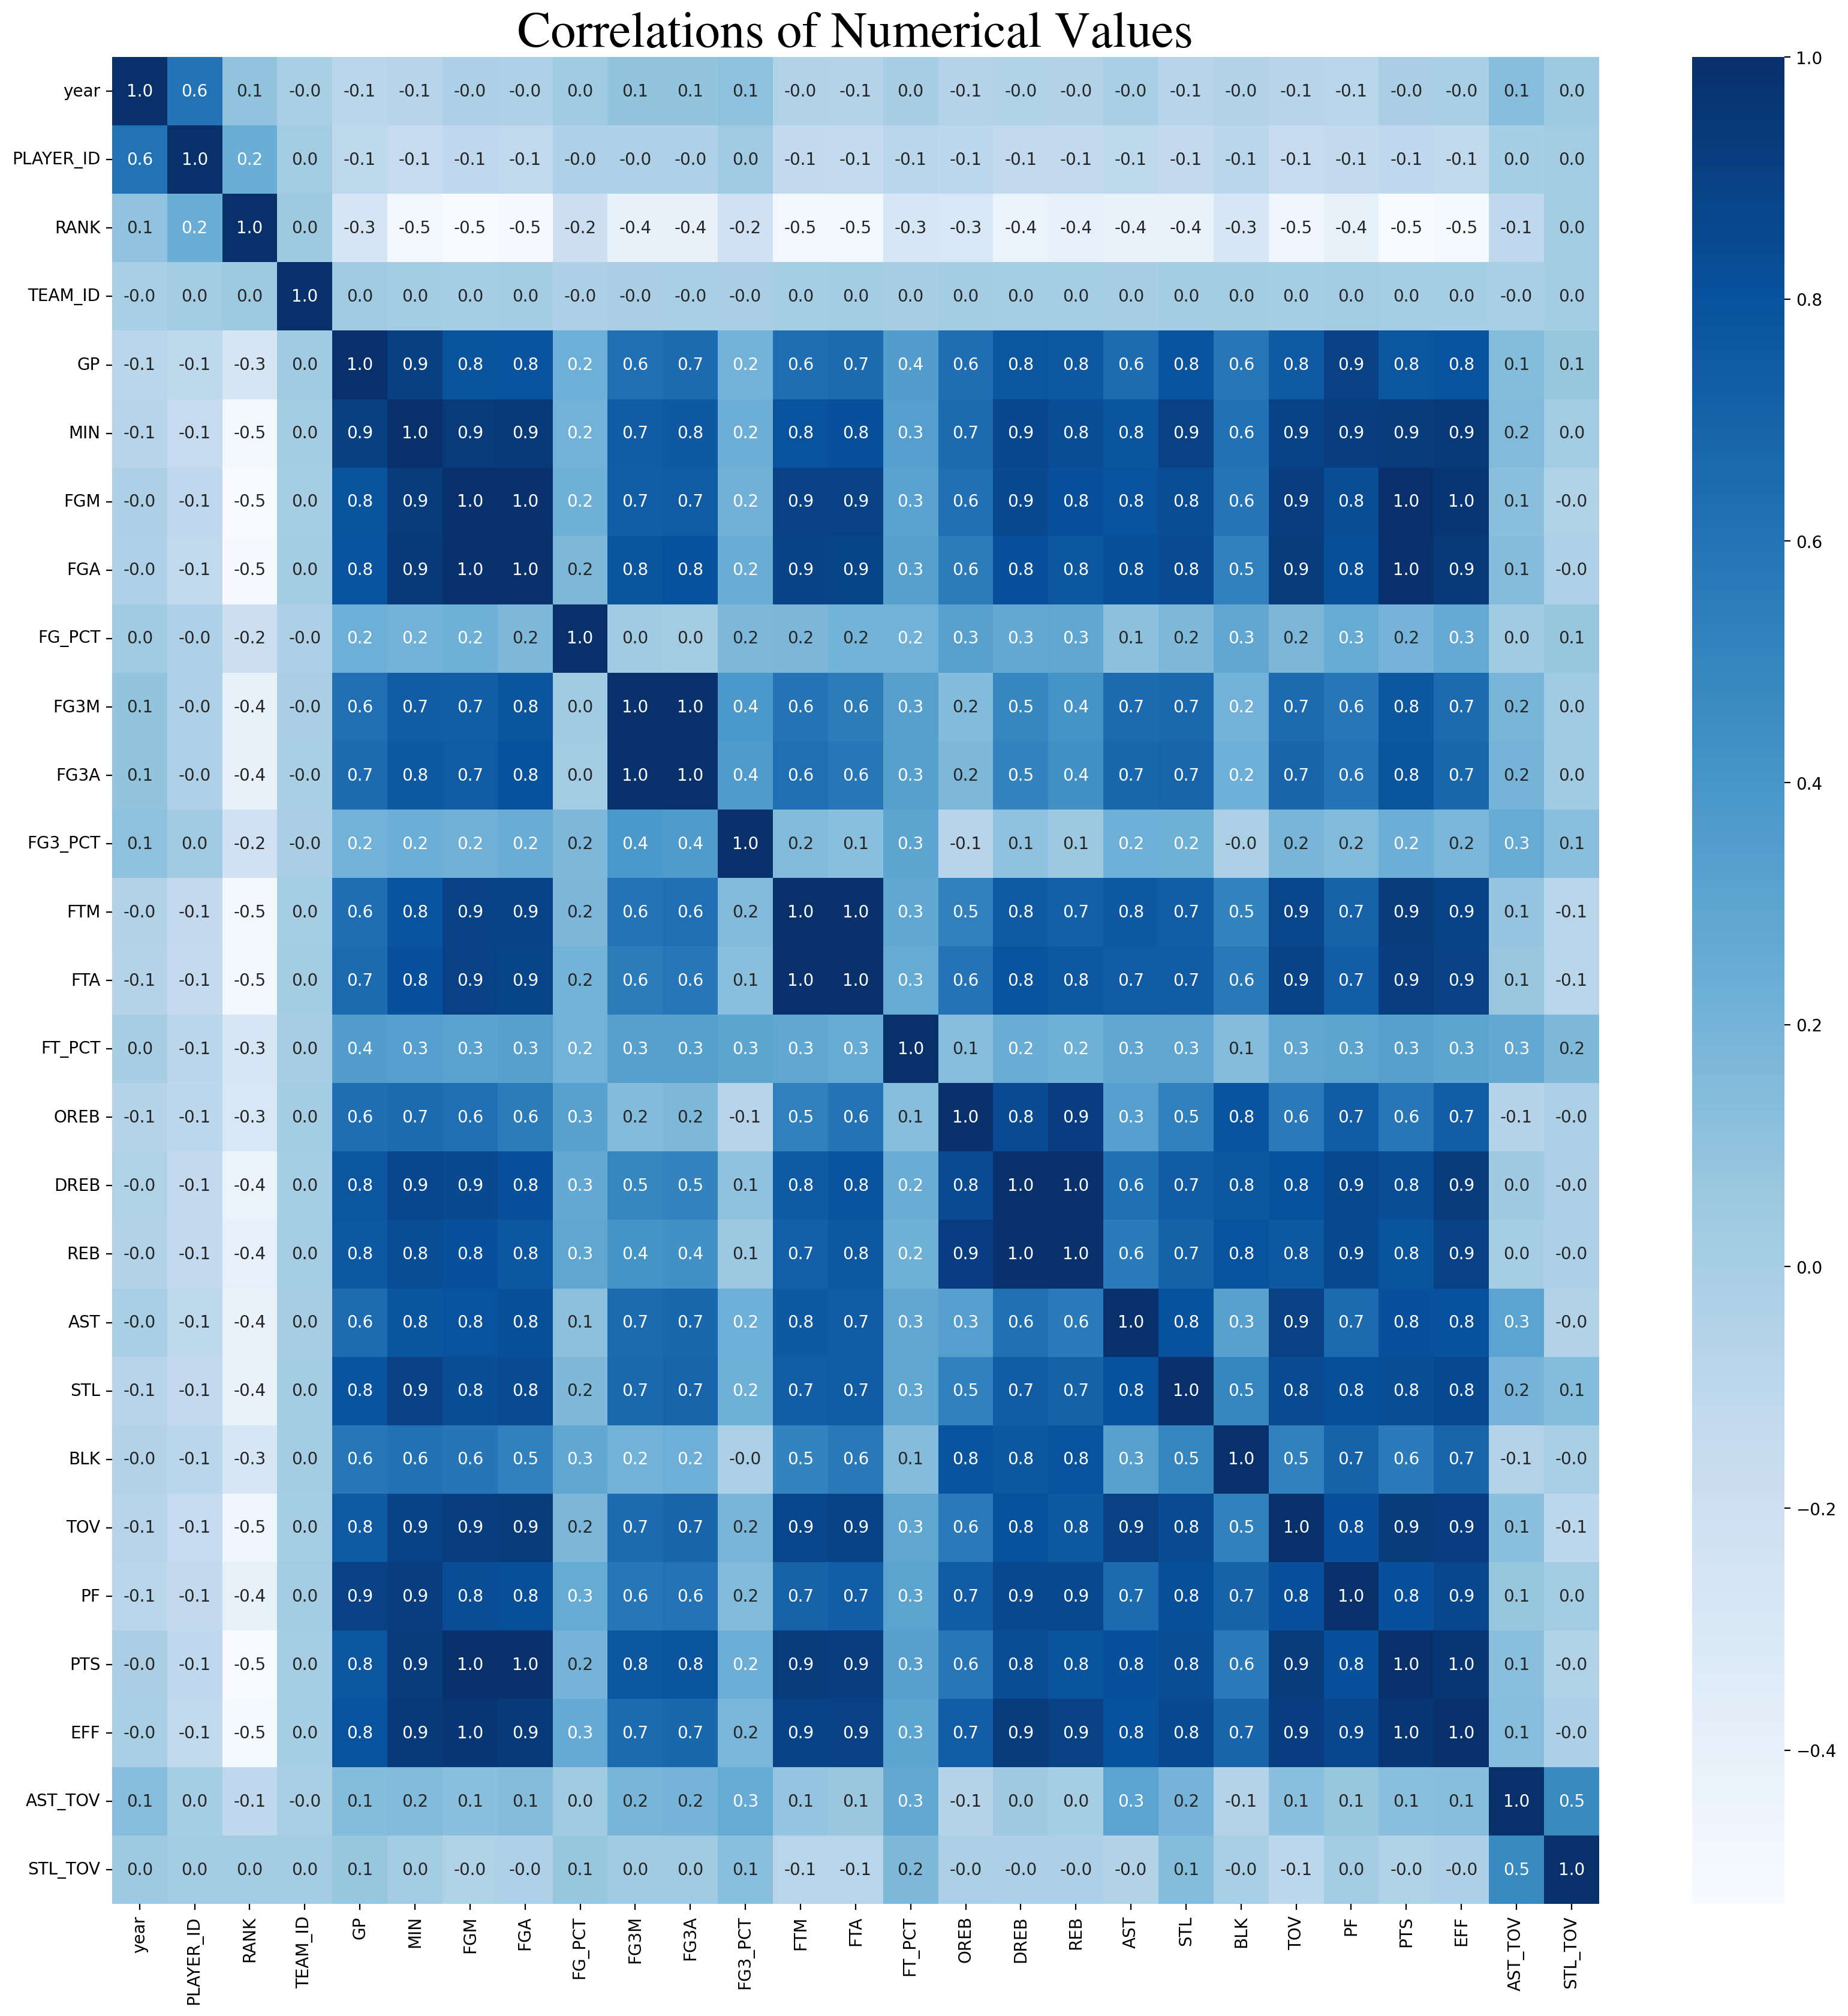

In [12]:
corr = nba_df2.corr(numeric_only=True)

plt.figure(figsize=(20, 20))  
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".1f")
plt.title("Correlations of Numerical Values", font="Times", size=30)
plt.show()

#
<div class="alert alert-block alert-warning"  style="background-color: #d59bf2; color: black;">  
<h2> Visualizations </h2>
</div>

## OREB vs. DREB vs. PTS for the NYK
(Offensive Rebounds vs. Defensive Rebounds vs. Points for the New York Knicks)

In [13]:
nyk = nba_df2[nba_df2["TEAM"]=="NYK"]

In [14]:
PTS_quantiles = nyk['PTS'].quantile([.0, 0.25, .5, 0.75,  1])
# PTS_quantiles[0.25]
PTS_quantiles

0.00       0.0
0.25      70.5
0.50     234.0
0.75     588.5
1.00    2212.0
Name: PTS, dtype: float64

In [15]:
def categorize_PTS(df):
    if df['PTS'] < PTS_quantiles[0.25]:
        return 'less than 70.5 points'
    elif (df['PTS'] >= PTS_quantiles[0.25])& (df['PTS'] < PTS_quantiles[0.50]):
        return 'between 70.5 and 234 points'
    elif (df['PTS'] >= PTS_quantiles[0.50])& (df['PTS'] < PTS_quantiles[0.75]):
        return 'between 234 and 588.5 points'
    else:
        return 'greater than 2212 points'
    
nyk['Label'] = nyk.apply(categorize_PTS, axis=1)

# separate data by points
nyk1 = nyk[nyk['Label']=='less than 70.5 points']
nyk2 = nyk[nyk['Label']=='between 70.5 and 234 points']
nyk3 = nyk[nyk['Label']=='between 234 and 588.5 points']
nyk4 = nyk[nyk['Label']=='greater than 2212 points']

/var/folders/_j/pzs88x3s1fv95pbq0f9_m8dm0000gn/T/ipykernel_1822/1592905036.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyk['Label'] = nyk.apply(categorize_PTS, axis=1)


In [16]:
OREB_max = nyk[nyk['OREB']==nyk['OREB'].max()]
DREB_max = nyk[nyk['DREB']==nyk['DREB'].max()]
PTS_max = nyk[nyk['PTS']==nyk['PTS'].max()]
OREB_max["OREB"]
OREB_max["DREB"]
DREB_max["OREB"]
DREB_max["DREB"]
PTS_max["OREB"]
PTS_max["DREB"]

8052    235
Name: DREB, dtype: int64

Font 'rm' does not have a glyph for '\U0001f3c0' [U+1f3c0], substituting with a dummy symbol.


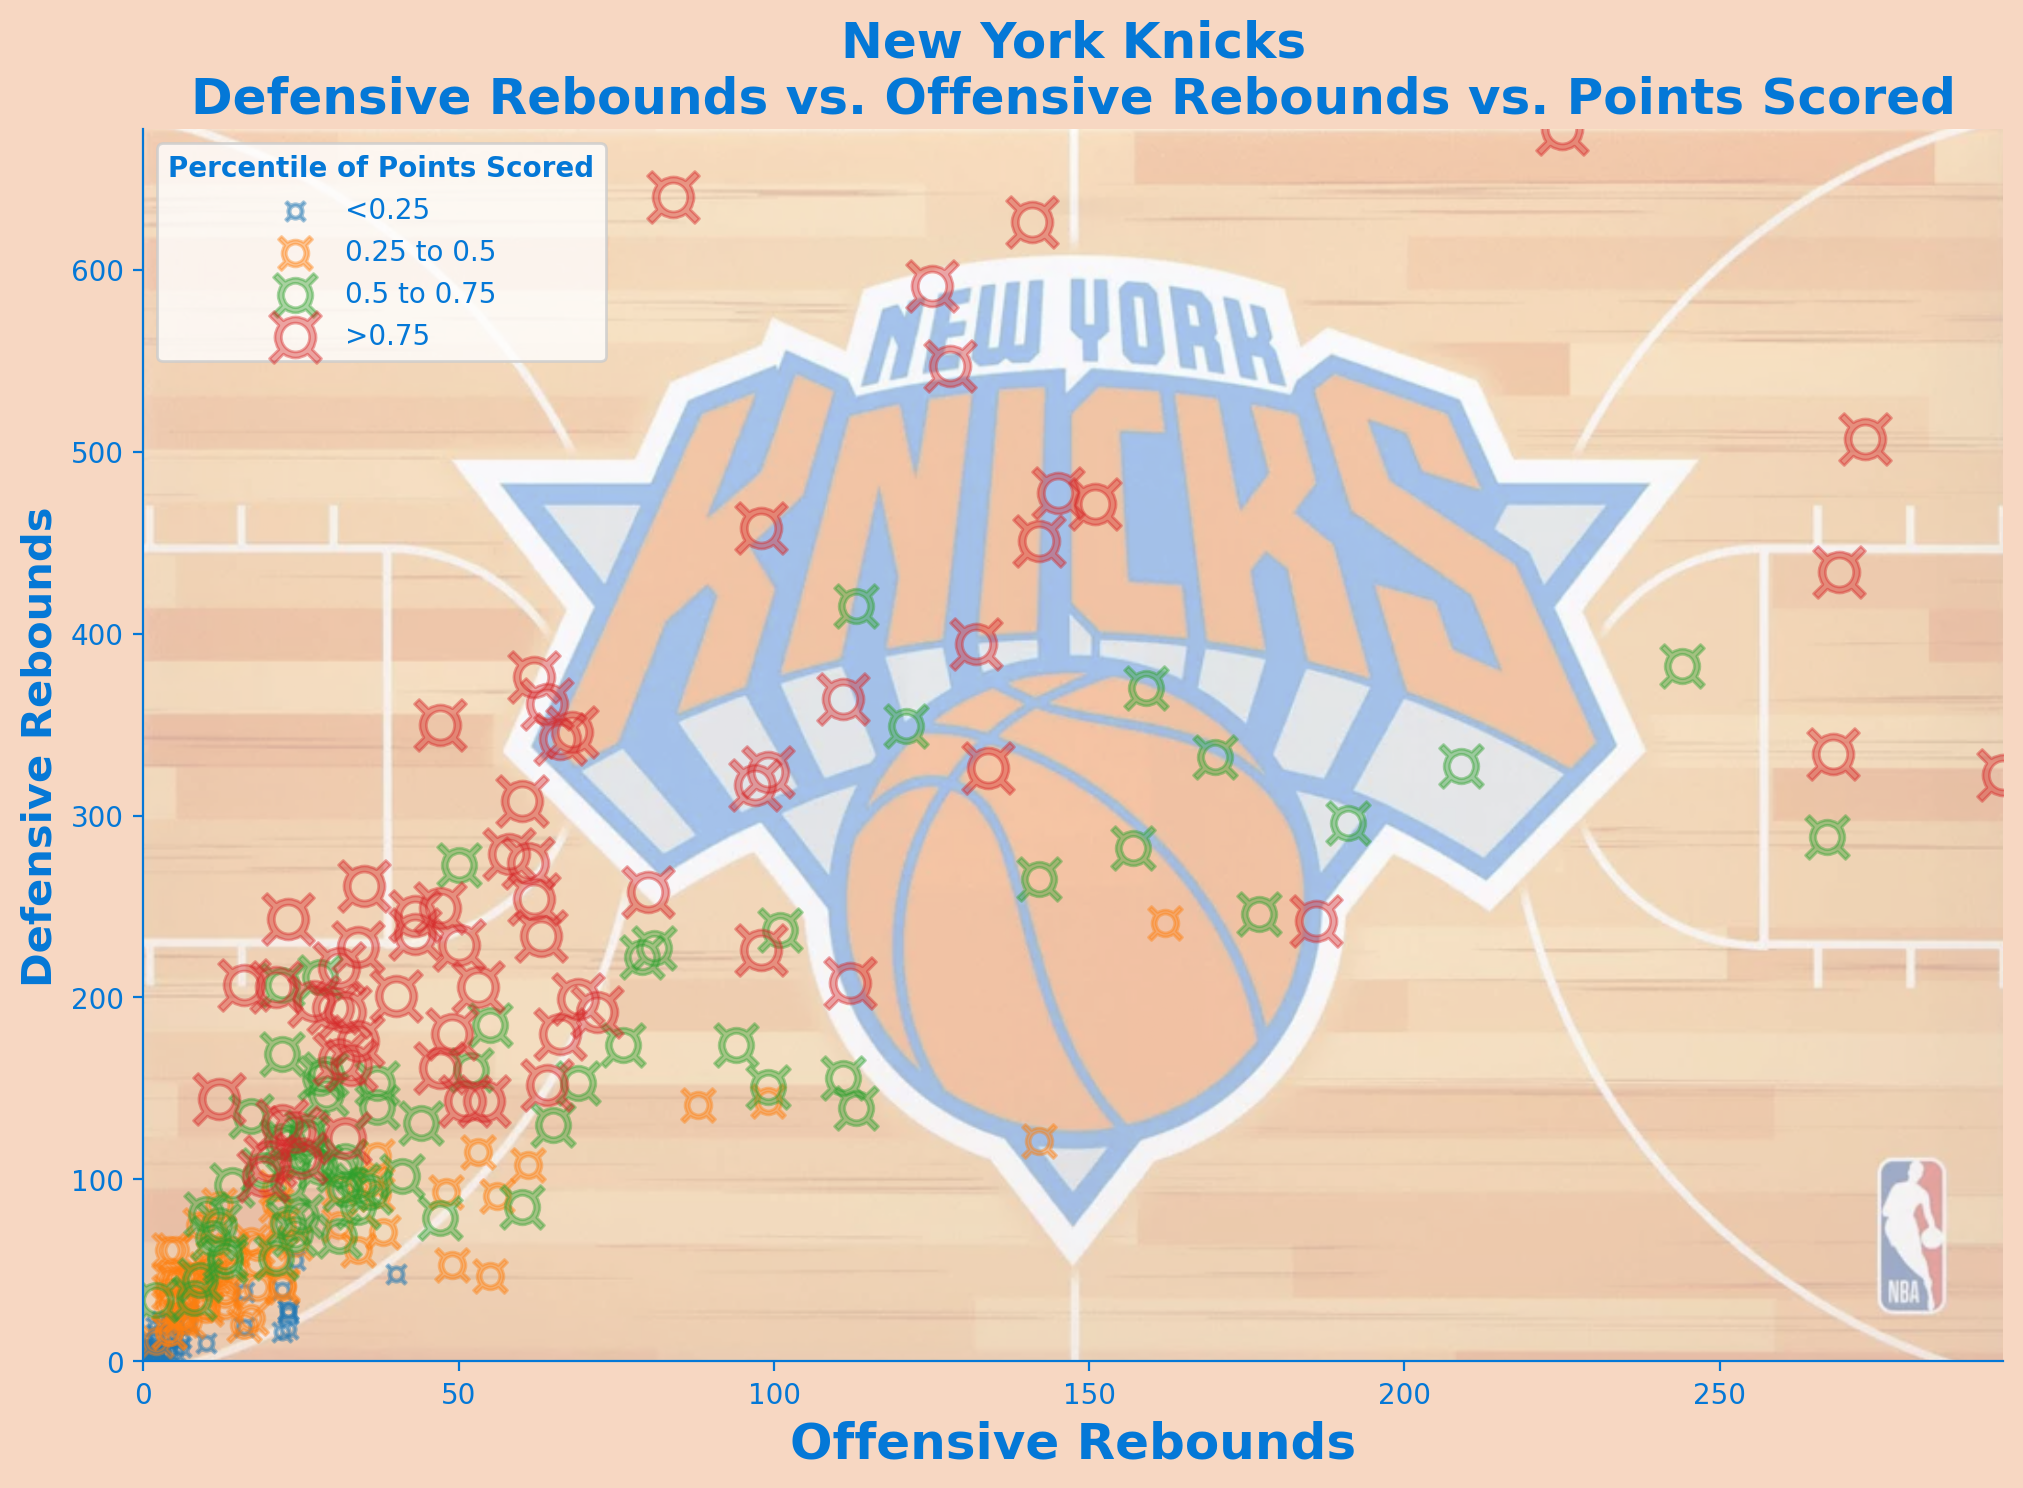

In [17]:
background, graph = plt.subplots(figsize=(12,8))

# Adding NYK court
nyk_court = mpimg.imread('nyk_court.png')
graph.imshow(nyk_court, aspect='auto', 
             extent=[nyk['OREB'].min(), nyk['OREB'].max(), 
                     nyk['DREB'].min(), nyk['DREB'].max()],
             alpha=0.45, zorder=-1) 

# Adding points 
graph.scatter(nyk1['OREB'], nyk1['DREB'], marker='$\U0001F3C0$', s=50, alpha=0.4, label = '<0.25')
graph.scatter(nyk2['OREB'], nyk2['DREB'], marker='$\U0001F3C0$', s=150, alpha=0.4, label = '0.25 to 0.5')
graph.scatter(nyk3['OREB'], nyk3['DREB'], marker='$\U0001F3C0$', s=250, alpha=0.4, label = '0.5 to 0.75')
graph.scatter(nyk4['OREB'], nyk4['DREB'], marker='$\U0001F3C0$', s=350, alpha=0.4, label = '>0.75')

# Making legend
legend = graph.legend(loc="upper left", title="Percentile of Points Scored", 
                      prop={'size': 10})
for text in legend.get_texts():
    text.set_color('#0478d7')
legend.get_title().set_color('#0478d7')
legend.get_title().set_fontweight('bold')
legend.get_title().set_fontsize(10)

# Adding labels 
graph.set_xlabel("Offensive Rebounds",
                 size=18, color='#0478d7', weight="bold")
graph.set_ylabel("Defensive Rebounds",
                 size=15, color='#0478d7', weight="bold")
graph.set_title("New York Knicks\nDefensive Rebounds vs. Offensive Rebounds vs. Points Scored",
                size=18, color='#0478d7', weight="bold")

# Customizing Ticks and Spines
graph.tick_params(axis='x', colors='#0478d7')  
graph.tick_params(axis='y', colors='#0478d7') 
graph.spines['right'].set_visible(False)
graph.spines['top'].set_visible(False)
graph.spines['bottom'].set_color('#0478d7')  
graph.spines['left'].set_color('#0478d7')

# graph.set_facecolor(color='#c2d6f0')
# background.patch.set_facecolor('#f6d6c2')
background.patch.set_facecolor('#f7d7c2')

plt.show()

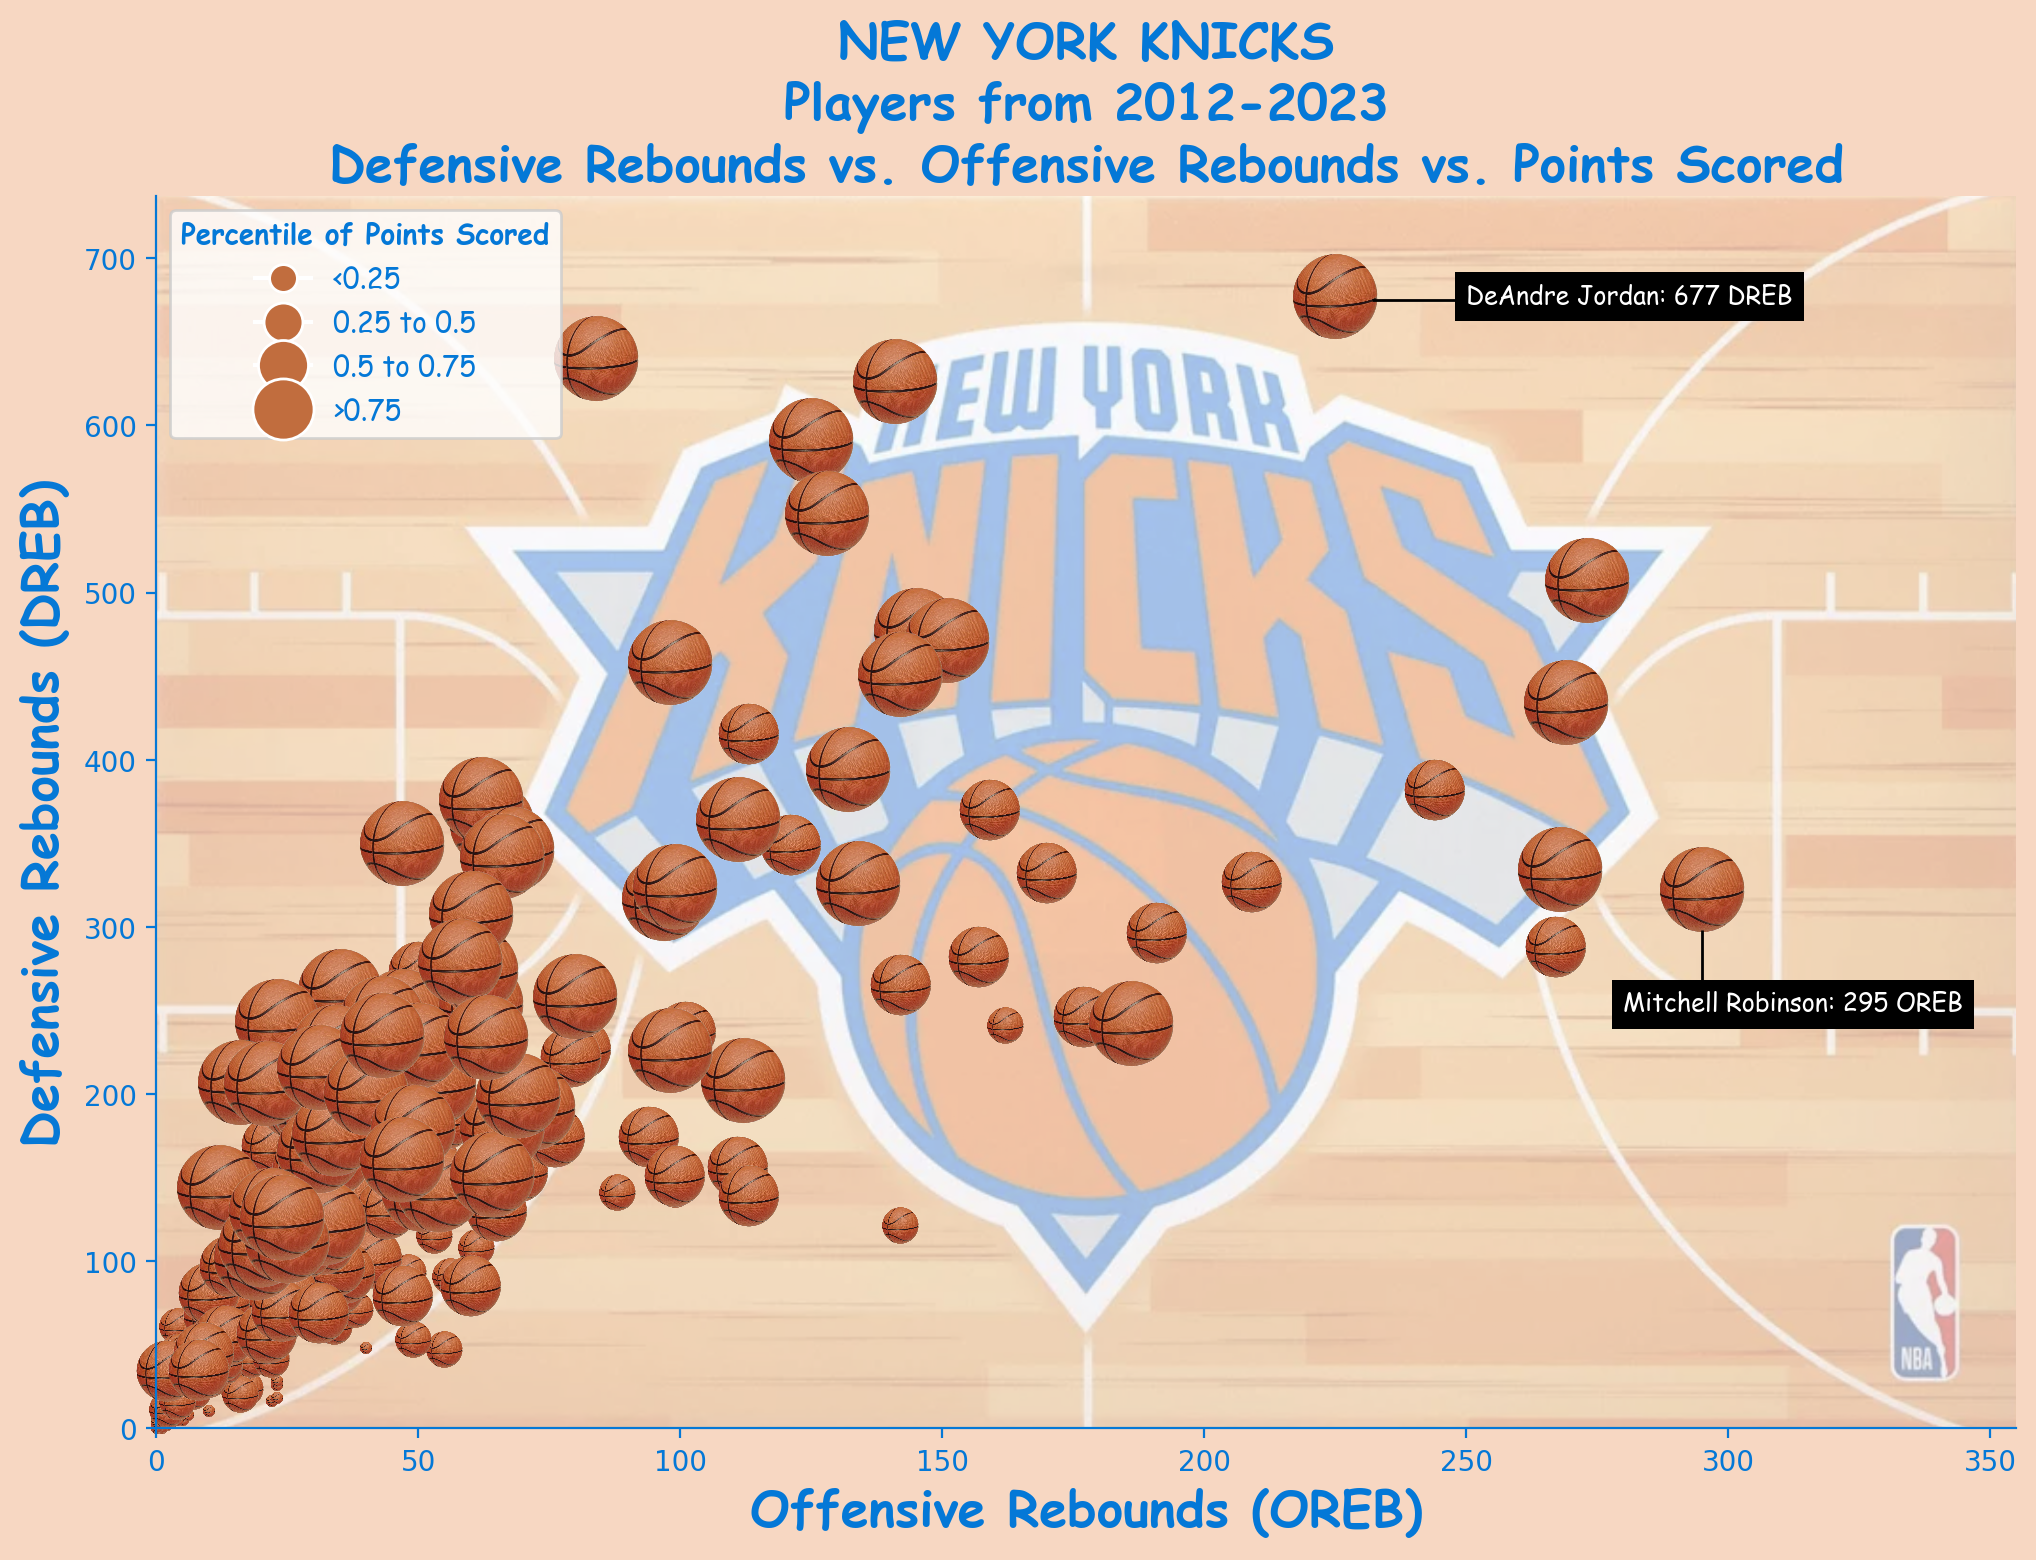

In [18]:
background, graph = plt.subplots(figsize=(12, 8))

# Adding NYK court
nyk_court = mpimg.imread('nyk_court.png')
graph.imshow(nyk_court, aspect='auto',
             extent=[nyk['OREB'].min(), nyk['OREB'].max()+60,
                     nyk['DREB'].min(), nyk['DREB'].max()+60],
             alpha=0.45, zorder=-1)

basketball_image = mpimg.imread('basketball.png')

# Function to plot basketballs
def plot_basketballs(x_data, y_data, size, zorder=1):
    for x, y in zip(x_data, y_data):
        imagebox = OffsetImage(basketball_image, zoom=size/3500)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False, zorder=zorder)
        graph.add_artist(ab)

# Plotting basketballs with different sizes
plot_basketballs(nyk1['OREB'], nyk1['DREB'], 50)
plot_basketballs(nyk2['OREB'], nyk2['DREB'], 150)
plot_basketballs(nyk3['OREB'], nyk3['DREB'], 250)
plot_basketballs(nyk4['OREB'], nyk4['DREB'], 350)

# # Adding special players
# graph.scatter(295, 322, s=1000, c='#0478d7', edgecolors="black", zorder=2)    # Mitchell Robinson   
# graph.scatter(225, 677, s=1000, c='#0478d7', edgecolors="black", zorder=2)    # DeAndre Jordan
# graph.scatter(43, 235, s=1000, c='#0478d7', edgecolors="black", zorder=2)     # Jalen Brunson

# # Adding label to the special players 
# graph.text(295, 322, "Mitchell Robinson", fontsize=14, fontname='Comic Sans MS')
# graph.text(220, 630, "DeAndre Jordan", fontsize=14, fontname='Comic Sans MS')
# graph.text(43, 235, "Jalen Brunson", fontsize=14, fontname='Comic Sans MS')

# Adding labels to explain the special players
graph.text(280, 250, "Mitchell Robinson: 295 OREB",    # Mitchell Robinson 
           fontsize=9, fontname='Comic Sans MS', c="white",
           bbox=dict(facecolor='black', edgecolor='none'))
graph.vlines(x=295, ymin=250, ymax=298, color='black', linewidth=1, alpha=1)

graph.text(250, 673, "DeAndre Jordan: 677 DREB",    # DeAndre Jordan
           fontsize=9, fontname='Comic Sans MS', c="white",
           bbox=dict(facecolor='black', edgecolor='none'))
graph.hlines(y=675, xmin=232, xmax=260, color='black', linewidth=1, alpha=1)

# Adding the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='<0.25',
                      markersize=10, markerfacecolor='#c16d3e'),
           plt.Line2D([0], [0], marker='o', color='w', label='0.25 to 0.5',
                      markersize=14, markerfacecolor='#c16d3e'),
           plt.Line2D([0], [0], marker='o', color='w', label='0.5 to 0.75',
                      markersize=18, markerfacecolor='#c16d3e'),
           plt.Line2D([0], [0], marker='o', color='w', label='>0.75',
                      markersize=22, markerfacecolor='#c16d3e')]

legend = graph.legend(handles=handles, loc="upper left", 
                      title="Percentile of Points Scored", 
                      prop={'size': 10, 'family': 'Comic Sans MS'})
for text in legend.get_texts():
    text.set_color('#0478d7')
legend.get_title().set_color('#0478d7')
legend.get_title().set_fontweight('bold')
legend.get_title().set_fontsize(10)
legend.get_title().set_fontfamily('Comic Sans MS')  

# Adding labels
graph.set_xlabel("Offensive Rebounds (OREB)", font="Comic Sans MS", size=18, color='#0478d7', weight="bold")
graph.set_ylabel("Defensive Rebounds (DREB)", font="Comic Sans MS", size=18, color='#0478d7', weight="bold")
graph.set_title("NEW YORK KNICKS\nPlayers from 2012-2023\nDefensive Rebounds vs. Offensive Rebounds vs. Points Scored",
                font="Comic Sans MS", size=18, color='#0478d7', weight="bold")

# Customizing ticks and spines
graph.tick_params(axis='x', colors='#0478d7')
graph.tick_params(axis='y', colors='#0478d7')
graph.spines['right'].set_visible(False)
graph.spines['top'].set_visible(False)
graph.spines['bottom'].set_color('#0478d7')
graph.spines['left'].set_color('#0478d7')

background.patch.set_facecolor('#f7d7c2')

plt.show()
